## Notebook used to bin categorical features 

**Primarily:**
* Hospital_id

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### 1. Load the Datasets

Load both training and test. Merge together for manipulation. We will split them out again when testing prediction models. 

In [55]:
df_training = pd.read_csv('training_v2.csv')
df_training.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [40]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [56]:
df_test = pd.read_csv('unlabeled.csv')
df_test.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,NaN,66.0,32.518596,1,African American,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,NaN,64.0,20.798520,0,Caucasian,M,182.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,NaN,56.0,NaN,0,Caucasian,M,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39308 entries, 0 to 39307
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(171), int64(7), object(8)
memory usage: 55.8+ MB


In [57]:
# Merge the two together 
df = pd.merge(df_training, df_test, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131021 entries, 0 to 131020
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(171), int64(7), object(8)
memory usage: 186.9+ MB


#### Open Pickle

In [5]:
with open('df_raw_training_and_test.pickle', 'rb') as read_file:
    df= pickle.load(read_file)

## Q: Are the hospital ids the same in the training and test dataset? Or are there unique hospital ids in test that aren't in training? 

In [44]:
hosp_ids_train = set(df_training['hospital_id'])
hosp_ids_train

{2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 43,
 44,
 46,
 47,
 49,
 50,
 51,
 53,
 54,
 55,
 57,
 60,
 62,
 63,
 64,
 66,
 68,
 69,
 70,
 71,
 72,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 109,
 111,
 112,
 113,
 116,
 117,
 118,
 119,
 121,
 124,
 125,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 145,
 146,
 147,
 149,
 150,
 151,
 155,
 157,
 158,
 159,
 160,
 161,
 166,
 167,
 168,
 169,
 171,
 174,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 192,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 202,
 204}

In [45]:
hosp_ids_test = set(df_test['hospital_id'])
hosp_ids_test

{1,
 3,
 6,
 7,
 11,
 12,
 22,
 25,
 28,
 30,
 41,
 42,
 45,
 48,
 52,
 56,
 58,
 59,
 61,
 65,
 66,
 67,
 73,
 75,
 82,
 86,
 96,
 97,
 104,
 106,
 108,
 110,
 114,
 115,
 120,
 121,
 122,
 123,
 126,
 127,
 131,
 141,
 143,
 144,
 148,
 152,
 153,
 154,
 156,
 162,
 163,
 164,
 165,
 170,
 172,
 173,
 175,
 178,
 183,
 184,
 190,
 191,
 193,
 195,
 201,
 203}

In [46]:
hosp_ids_train.symmetric_difference(hosp_ids_test)

{1,
 2,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192

**A: Unfortunately there are some unique hospitals in test** that aren't in the training set... This means we won't be able to bin hospitals according to their death rates per capita, since we don't have death information for the test data. 

We can, however, bin according to other information we have. We will just work on both the training and test set together as a single dataset before splitting them for modeling. 

## Q: What information do we have in both the test and training sets that we can use? 

In [31]:
df.isna().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
hospital_death                    39308
age                                5882
bmi                                4515
elective_surgery                      0
ethnicity                          1566
gender                               40
height                             2084
hospital_admit_source             33357
icu_admit_source                    227
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             3484
albumin_apache                    79029
apache_2_diagnosis                 2558
apache_3j_diagnosis                1738
apache_post_operative                 0
arf_apache                          894
bilirubin_apache                  83426
bun_apache                        26278


In [60]:
df_no_nulls = df.dropna(axis=1)
df_no_nulls.head()

,encounter_id,patient_id,hospital_id,elective_surgery,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,patients_per_hospital
0,66154,25312,118,0,92,admit,CTICU,0.541667,0,0,4333
1,114252,59342,81,0,90,admit,Med-Surg ICU,0.927778,0,0,580
2,119783,50777,118,0,93,admit,Med-Surg ICU,0.000694,0,0,4333
3,79267,46918,118,1,92,admit,CTICU,0.000694,0,1,4333
4,92056,34377,33,0,91,admit,Med-Surg ICU,0.073611,0,0,323


In [61]:
df_no_nulls.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'elective_surgery',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days',
       'readmission_status', 'apache_post_operative', 'patients_per_hospital'],
      dtype='object')

In [62]:
df_no_nulls.nunique()

encounter_id             131021
patient_id               131021
hospital_id                 204
elective_surgery              2
icu_id                      328
icu_stay_type                 3
icu_type                      8
pre_icu_los_days          11380
readmission_status            1
apache_post_operative         2
patients_per_hospital       187
dtype: int64

**A: Not very many columns.** 

* encounter_id and patient_id are both unique values to the dataset, so not useful for binning. 

* icu_id seems to be a combination of hospital_id and icu_type - so since this information is already encoded in other features, I wont' use it. 

* We could use the number of patients per hospital though. 

In [56]:
# Add the frequency of patients for each hospital id as a column to the dataframe
df['patients_per_hospital'] = df.groupby(by='hospital_id')['hospital_id'].transform('count')
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,patients_per_hospital
0,66154,25312,118,0.0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,4333
1,114252,59342,81,0.0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,580
2,119783,50777,118,0.0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,4333
3,79267,46918,118,0.0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333
4,92056,34377,33,0.0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,323


In [57]:
# Check to see that the previous function worked 
df[df['hospital_id'] == 118]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,patients_per_hospital
0,66154,25312,118,0.0,68.0,22.730000,0,Caucasian,M,180.30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,4333
2,119783,50777,118,0.0,25.0,31.950000,0,Caucasian,F,172.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,4333
3,79267,46918,118,0.0,81.0,22.640000,1,Caucasian,F,165.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333
8,80471,10577,118,1.0,45.0,NaN,0,Caucasian,M,170.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333
9,42871,90749,118,0.0,50.0,25.710000,0,NaN,M,175.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333
12,76356,41311,118,0.0,48.0,NaN,0,Caucasian,M,175.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,4333
13,34030,103766,118,0.0,65.0,NaN,1,Caucasian,M,172.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,4333
14,108388,98174,118,0.0,81.0,38.189067,1,Caucasian,M,172.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,4333
15,120677,124688,118,0.0,78.0,NaN,0,Caucasian,F,160.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,4333
17,22471,112115,118,0.0,46.0,25.845717,0,Hispanic,M,167.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,4333


In [58]:
df['patients_per_hospital'].describe()

count    131021.000000
mean       1527.399249
std        1104.982130
min           2.000000
25%         673.000000
50%        1260.000000
75%        2470.000000
max        4333.000000
Name: patients_per_hospital, dtype: float64

In [63]:
# Dropping rows containing null values for visualization purposes only
df_no_nulls = df_no_nulls.dropna(axis=0)
df_no_nulls.head()

,encounter_id,patient_id,hospital_id,elective_surgery,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,patients_per_hospital
0,66154,25312,118,0,92,admit,CTICU,0.541667,0,0,4333
1,114252,59342,81,0,90,admit,Med-Surg ICU,0.927778,0,0,580
2,119783,50777,118,0,93,admit,Med-Surg ICU,0.000694,0,0,4333
3,79267,46918,118,1,92,admit,CTICU,0.000694,0,1,4333
4,92056,34377,33,0,91,admit,Med-Surg ICU,0.073611,0,0,323


In [64]:
df_no_nulls['patients_per_hospital'] = df_no_nulls.groupby(by='hospital_id')['patient_id'].count()
df_no_nulls.head()

,encounter_id,patient_id,hospital_id,elective_surgery,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_post_operative,patients_per_hospital
0,66154,25312,118,0,92,admit,CTICU,0.541667,0,0,NaN
1,114252,59342,81,0,90,admit,Med-Surg ICU,0.927778,0,0,1184.0
2,119783,50777,118,0,93,admit,Med-Surg ICU,0.000694,0,0,1284.0
3,79267,46918,118,1,92,admit,CTICU,0.000694,0,1,45.0
4,92056,34377,33,0,91,admit,Med-Surg ICU,0.073611,0,0,7.0


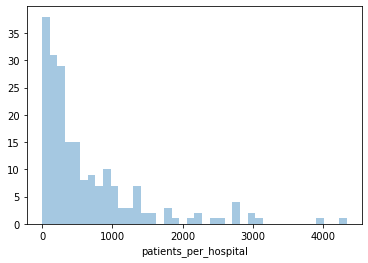

In [69]:
sns.distplot(df_no_nulls['patients_per_hospital'], bins=40, kde=False)

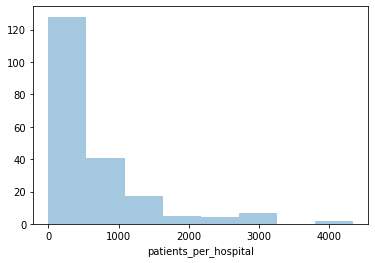

In [70]:
sns.distplot(df_no_nulls['patients_per_hospital'], bins=8, kde=False)

### Setting ordinal bins: 

It looks like most of the hospitals have 500  or less patients in this year, but there's a subset that has more. What if we subsetted into 5 categories: 0-750, 750-1500, 1500-2250, 2250 - 3000, >3000. And these categories would be ordinal, so we could assign them numbers: 1, 2, 3, 4, 5 to represent how much traffic there was in the ICU during the study. 

In [71]:
# Create a column to store the bin category (1 of the 3)
bins = [0, 750, 1500, 2250, 3000, 5000]
names = [1,2,3,4,5]

df['hospital_traffic_bin'] = pd.cut(df['patients_per_hospital'], bins, labels=names)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,patients_per_hospital,hospital_traffic_bin
0,66154,25312,118,0.0,68.0,22.73,0,Caucasian,M,180.3,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,4333,5
1,114252,59342,81,0.0,77.0,27.42,0,Caucasian,F,160.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,580,1
2,119783,50777,118,0.0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,4333,5
3,79267,46918,118,0.0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,4333,5
4,92056,34377,33,0.0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,323,1


In [72]:
with open('df_hospital_bins2.pickle','wb') as to_write:
    pickle.dump(df,to_write)